## Análisis de Variables

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')
data = pd.DataFrame(df)

# Get the total number of people that answered the survey
totalPeople = len(data)

### Motivación de Estudiantes Universitarios según su Región de Origen

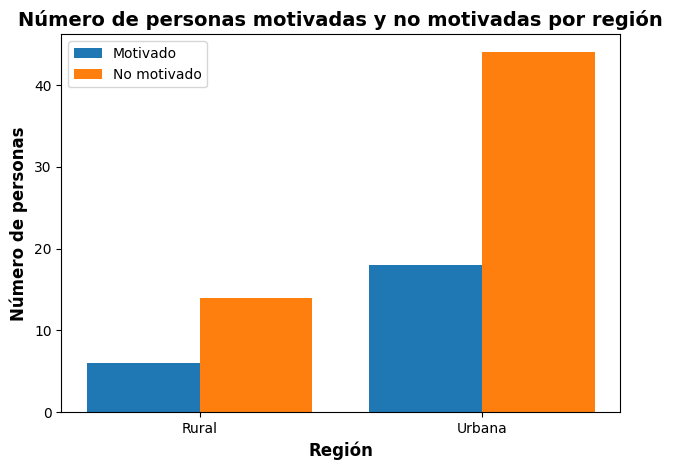

In [50]:
# Define the columns that will be used to get the number of people that answered the survey by region of origin and motivation by teachers
region_col = 'Indique la región de la cual viene'
motivated_col = '¿Tuvo motivación por los profesores de secundaria para escoger la carrera?'

# Get the number of people that answered the survey by region of origin
rural_motivated = data[(data[region_col] == 'Rural') & (data[motivated_col] == 'Si')]
rural_non_motivated = data[(data[region_col] == 'Rural') & (data[motivated_col] == 'No')]
urban_motivated = data[(data[region_col] == 'Urbana') & (data[motivated_col] == 'Si')]
urban_non_motivated = data[(data[region_col] == 'Urbana') & (data[motivated_col] == 'No')]

# Get the number of people that answered the survey by region of origin and motivation by teachers
motivated_counts = [len(rural_motivated), len(urban_motivated)]
non_motivated_counts = [len(rural_non_motivated), len(urban_non_motivated)]

# Define the labels for the regions
region_labels = ['Rural', 'Urbana']

regionIndexes = np.arange(len(region_labels))

plt.bar(regionIndexes - 0.2, motivated_counts, 0.4, label='Motivado')
plt.bar(regionIndexes + 0.2, non_motivated_counts, 0.4, label='No motivado')

plt.xticks(regionIndexes, region_labels)
plt.xlabel("Región", fontsize=12, fontweight='bold')
plt.ylabel("Número de personas", fontsize=12, fontweight='bold')
plt.title("Número de personas motivadas y no motivadas por región", fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('results/motivated_by_region.png', bbox_inches='tight')
plt.show()


### Distribución de genero de las personas que respondieron la encuesta 

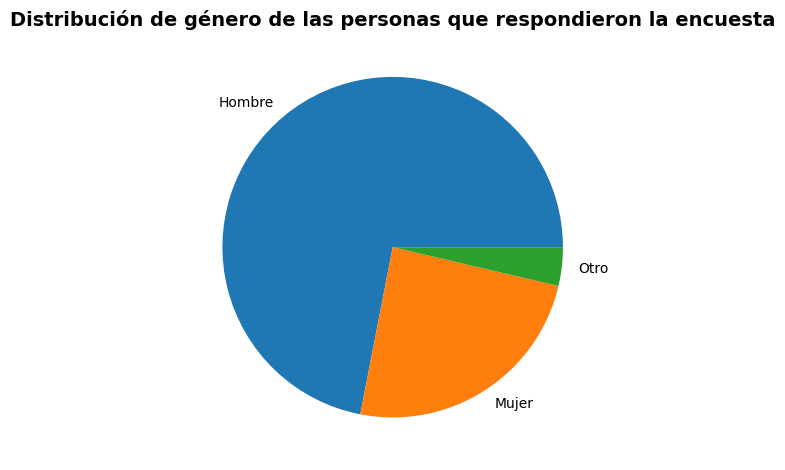

In [51]:
# Define the columns that will be used to get the number of people that answered the survey by gender
gender_col = 'Género'

# Get the number of people that answered the survey by gender
male = data[gender_col].value_counts()['Hombre']
female = data[gender_col].value_counts()['Mujer']
other = totalPeople - male - female

# Define the labels and data for the pie chart
labels = ['Hombre', 'Mujer', 'Otro']
pie_data = [male, female, other]

plt.title("Distribución de género de las personas que respondieron la encuesta", fontsize=14, fontweight='bold')
plt.pie(pie_data, labels = labels)
plt.tight_layout()
plt.savefig('results/gender_distribution.png', bbox_inches='tight')
plt.show() 


### Distribución de las emociones al ingresar a la carrera por genero

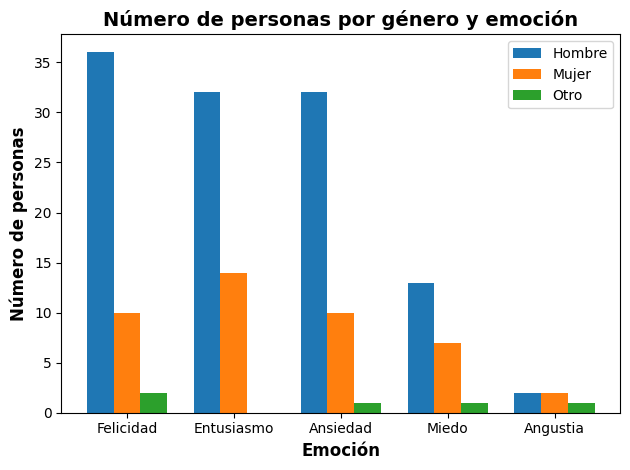

In [52]:
# Define the columns that will be used to get the number of people that answered the survey by emotional response to being accepted by gender
emotional_response_col = '¿Cuál fue su emoción al ingresar a la carrera?'
gender_col = 'Género'

# Get all the possible values for the emotional response column, each column can have multiple values
# emotional_responses = data[emotional_response_col].str.split(',').explode().dropna()

# Primary emotions that will be used to group the emotional responses by gender
happiness = 'Felicidad'
enthusiasm = 'Entusiasmo'
anxiety = 'Ansiedad'
fear = 'Miedo'
distress = 'Angustia'

# Get the number of males that answered the survey by emotional response to being accepted
happy_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(happiness, na=False))].shape[0]
enthusiastic_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
anxious_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
fearful_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(fear, na=False))].shape[0]
distressed_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(distress, na=False))].shape[0]

# Get the number of females that answered the survey by emotional response to being accepted
happy_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(happiness, na=False))].shape[0]
enthusiastic_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
anxious_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(anxiety, na=False))].shape[0]
fearful_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(fear, na=False))].shape[0]
distressed_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(distress, na=False))].shape[0]

# Get the number of remaining genders that answered the survey by emotional response to being accepted
happy_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(happiness, na=False))].shape[0]
enthusiastic_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
anxious_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(anxiety, na=False))].shape[0]
fearful_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(fear, na=False))].shape[0]
distressed_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(distress, na=False))].shape[0]

# Get the counts for each emotional response by gender
male_counts = [happy_males, enthusiastic_males, anxious_males, fearful_males, distressed_males]
female_counts = [happy_females, enthusiastic_females, anxious_females, fearful_females, distressed_females]
other_counts = [happy_others, enthusiastic_others, anxious_others, fearful_others, distressed_others]

# Define the labels for the emotional responses
emotional_labels = ['Felicidad', 'Entusiasmo', 'Ansiedad', 'Miedo', 'Angustia']

# Define the index for the bars
index = np.arange(len(emotional_labels))

# Define the width of each bar
bar_width = 0.25

# Plotting the bars
plt.bar(index - bar_width, male_counts, bar_width, label='Hombre')
plt.bar(index, female_counts, bar_width, label='Mujer')
plt.bar(index + bar_width, other_counts, bar_width, label='Otro')

# Adding labels, title, and legend
plt.xlabel('Emoción', fontsize=12, fontweight='bold')
plt.ylabel('Número de personas', fontsize=12, fontweight='bold')
plt.title('Número de personas por género y emoción', fontsize=14, fontweight='bold')
plt.xticks(index, emotional_labels)
plt.legend()
plt.tight_layout()
plt.savefig('results/emotional_response_by_gender.png', bbox_inches='tight')
plt.show()

